In [1]:
import numpy as np
import pandas as pd

# Load the dataset from 'final.csv' file with UTF-8 encoding
data = pd.read_csv('final.csv', encoding='cp949')
df = pd.DataFrame(data)  # Create a DataFrame from the loaded data
print(df)  # Print the DataFrame to check its contents

          시점  자치구역번호   조출생률  고령인구비율  청년 순이동수      사업체수  문화시설 개수  학원수 (개)  \
0     200802       1  10.01     8.4     2244  358446.0     22.0  11261.0   
1     200803       1   9.73     8.4    -5057  358339.0     22.0  11261.0   
2     200804       1   9.40     8.5    -6978  358233.0     22.0  11261.0   
3     200805       1   8.82     8.5    -8537  358126.0     22.0  11261.0   
4     200806       1   8.60     8.5    -9643  358020.0     22.0  11261.0   
...      ...     ...    ...     ...      ...       ...      ...      ...   
3222  202310      17   4.90    17.8      -26   30464.0      NaN   1212.0   
3223  202311      17   4.30    17.9     -135   30464.0      NaN   1212.0   
3224  202312      17   3.90    17.9     -438   30464.0      NaN   1212.0   
3225  202401      17   5.20    18.0     -761   30464.0      NaN      NaN   
3226  202402      17   5.20    18.1     -546   30464.0      NaN      NaN   

      수강인원 (명)  소멸위험지수   단계  
0     986758.0  2.0452   안정  
1     986758.0  2.0452   안정

In [2]:
# Fill missing values using forward fill method
df.fillna(method='ffill', inplace=True)
# Check for any remaining missing values
df.isna().sum()
# Display the first few rows of the DataFrame
df.head()

,시점,자치구역번호,조출생률,고령인구비율,청년 순이동수,사업체수,문화시설 개수,학원수 (개),수강인원 (명),소멸위험지수,단계
0,200802,1,10.01,8.4,2244,358446.0,22.0,11261.0,986758.0,2.0452,안정
1,200803,1,9.73,8.4,-5057,358339.0,22.0,11261.0,986758.0,2.0452,안정
2,200804,1,9.40,8.5,-6978,358233.0,22.0,11261.0,986758.0,2.0452,안정
3,200805,1,8.82,8.5,-8537,358126.0,22.0,11261.0,986758.0,2.0452,안정
4,200806,1,8.60,8.5,-9643,358020.0,22.0,11261.0,986758.0,2.0452,안정


In [3]:
# Apply StandardScaler for KMeans algorithm
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_data = scaler.fit_transform(df.drop(columns=['시점', '자치구역번호','단계','소멸위험지수']))
std_df = pd.DataFrame(std_data, columns=['조출생률','고령인구비율','청년 순이동수','사업체수','문화시설 개수','학원수','수강인원'])
std_df['소멸위험지수'] = df['소멸위험지수']

std_df.head()

,조출생률,고령인구비율,청년 순이동수,사업체수,문화시설 개수,학원수,수강인원,소멸위험지수
0,1.148233,-1.451919,0.668149,1.976151,-0.548177,1.469289,0.885573,2.0452
1,1.020253,-1.451919,-1.503424,1.975295,-0.548177,1.469289,0.885573,2.0452
2,0.869419,-1.427866,-2.074796,1.974446,-0.548177,1.469289,0.885573,2.0452
3,0.604318,-1.427866,-2.538497,1.973589,-0.548177,1.469289,0.885573,2.0452
4,0.503763,-1.427866,-2.867460,1.972741,-0.548177,1.469289,0.885573,2.0452


Mean Squared Error: 0.032353852651060645
R^2 Score: 0.8286604047249417


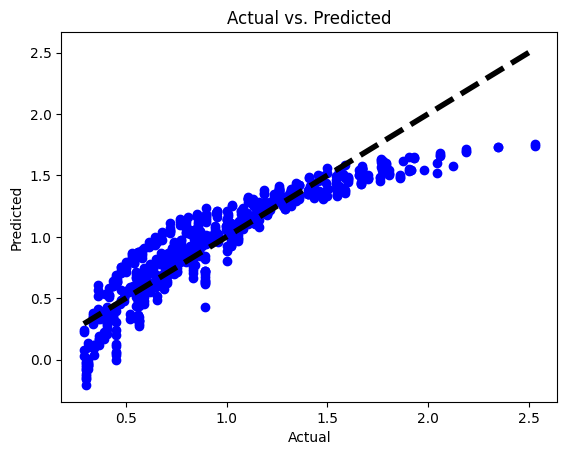

In [4]:
# Using LinearRegression Model for predicting Population Extinction Index
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Dropping unnecessary columns from the dataset
test_dataset = df.drop(columns=['시점','자치구역번호','단계'])
X = test_dataset.drop(['소멸위험지수'], axis=1)
y = test_dataset['소멸위험지수']

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Training the Multiple Regression Model
model.fit(X_train, y_train)

# Making predictions on the test data using the model
y_pred = model.predict(X_test)

# Evaluating the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Checking the accuracy
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualization
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()